In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Data Science\Assignments\6 Logistic Regression\bank-full.csv", sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df=df.drop(columns=['age','job','marital','education','default','contact','day','month','poutcome','pdays','previous'],axis=1)
df.head(5)

,balance,housing,loan,duration,campaign,y
0,2143,yes,no,261,1,no
1,29,yes,no,151,1,no
2,2,yes,yes,76,1,no
3,1506,yes,no,92,1,no
4,1,no,no,198,1,no


In [5]:
df.columns

Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'y'], dtype='object')

In [6]:
df=df[['y','balance', 'housing', 'loan', 'duration', 'campaign']]
df.head(1)

,y,balance,housing,loan,duration,campaign
0,no,2143,yes,no,261,1


In [7]:
df.shape

(45211, 6)

In [8]:
df.isna().sum()

y           0
balance     0
housing     0
loan        0
duration    0
campaign    0
dtype: int64

In [9]:
##Missing Value imputation
from sklearn.impute import SimpleImputer

In [10]:
si = SimpleImputer(strategy='most_frequent')

In [11]:
df.iloc[:,1:8] = si.fit_transform(df.iloc[:,1:8])

In [12]:
df.isna().sum()

y           0
balance     0
housing     0
loan        0
duration    0
campaign    0
dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg = LogisticRegression()

In [19]:
df['y'].replace('no','0',inplace=True)
df['y'].replace('yes','1',inplace=True)
df['housing'].replace('no','0',inplace=True)
df['housing'].replace('yes','1',inplace=True)
df['loan'].replace('no','0',inplace=True)
df['loan'].replace('yes','1',inplace=True)
df

,y,balance,housing,loan,duration,campaign
0,0,2143,1,0,261,1
1,0,29,1,0,151,1
2,0,2,1,1,76,1
3,0,1506,1,0,92,1
4,0,1,0,0,198,1
...,...,...,...,...,...,...
45206,1,825,0,0,977,3
45207,1,1729,0,0,456,2
45208,1,5715,0,0,1127,5
45209,0,668,0,0,508,4


In [20]:
df.dtypes

y           object
balance      int64
housing     object
loan        object
duration     int64
campaign     int64
dtype: object

In [21]:
df = df.astype({'loan':'float'})
df = df.astype({'housing':'float'})
df = df.astype({'y':'float'})
df = df.astype({'balance':'float'})
df = df.astype({'duration':'float'})
df = df.astype({'campaign':'float'})

In [22]:
df.dtypes

y           float64
balance     float64
housing     float64
loan        float64
duration    float64
campaign    float64
dtype: object

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.iloc[:,1:]
y = df['y']

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [27]:
xtrain

,balance,housing,loan,duration,campaign
32731,137.0,1.0,0.0,343.0,2.0
1498,830.0,1.0,0.0,246.0,2.0
17532,1103.0,1.0,1.0,148.0,15.0
8166,229.0,1.0,0.0,214.0,2.0
15495,2858.0,1.0,1.0,247.0,5.0
...,...,...,...,...,...
43723,1830.0,0.0,0.0,318.0,3.0
32511,528.0,1.0,0.0,233.0,2.0
5192,4191.0,0.0,0.0,363.0,6.0
12172,1783.0,0.0,0.0,11.0,11.0


In [28]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [29]:
len(xtest)

11303

In [30]:
len(ypred)

11303

In [32]:
print('Actual Y: ', ytest[:250].values)
print('Predict Y:', ypred[:250])

Actual Y:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predict Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9998
         1.0       0.56      0.19      0.28      1305

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.61     11303
weighted avg       0.86      0.89      0.86     11303



In [35]:
confusion_matrix(ytest,ypred)

array([[9804,  194],
       [1058,  247]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

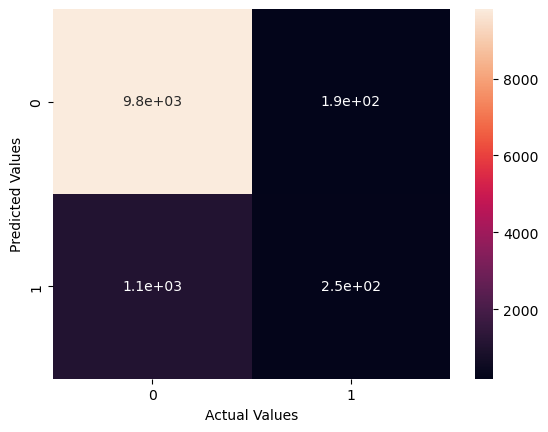

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [37]:
print(ytest[:250].values)
print(ypred[:250])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [38]:
#Threshold selection
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.03000649, 0.15705151, 0.18933295, ..., 0.25479785, 0.8117167 ,
       0.00801964])

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

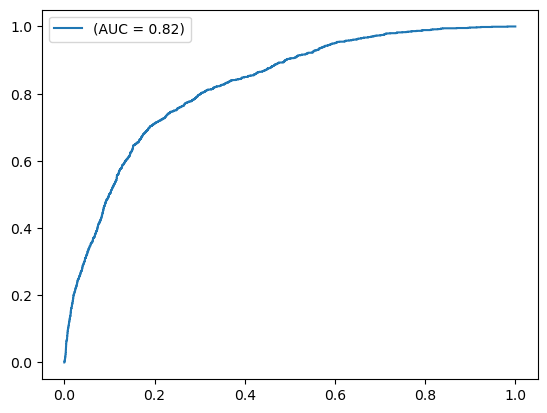

In [40]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [41]:
auc

0.8247581317029689

In [42]:
threshold

array([1.99994841e+00, 9.99948411e-01, 9.99939600e-01, ...,
       3.13873458e-03, 3.13645669e-03, 3.62915423e-06])

In [43]:
len(threshold)

1987

In [44]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [45]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
178,0.558102,0.889764
179,0.557406,0.889764
223,0.489084,0.889764
175,0.559439,0.889675
228,0.478603,0.889675
...,...,...
1982,0.009685,0.161904
1983,0.009675,0.161815
1984,0.003139,0.130939
1985,0.003136,0.130850


In [46]:
from sklearn.preprocessing import binarize

In [47]:
y = binarize([proba], threshold=0.558102)[0]
y

array([0., 0., 0., ..., 0., 1., 0.])

In [48]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9998
         1.0       0.58      0.16      0.25      1305

    accuracy                           0.89     11303
   macro avg       0.74      0.57      0.60     11303
weighted avg       0.86      0.89      0.86     11303

